In [1]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
def load_data(x):   
    df = pd.read_csv('Daliac\dataset_' + str(x + 1) + '.txt', sep=',', header=None)
    print('deal with dataset ' + str(x + 1))
    return df
    
def filter_data(data): # Butterworth low-pass filter.
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    for j in range(24):
        data[:, j] = signal.lfilter(b, a, data[:, j])

def plot_data(data):
    plt.plot(data)
    plt.show()
    
def data_visulization():
    df = pd.DataFrame()
    for i in range(19):
        df = pd.concat([df, load_data(i)])
    # Plotting data from 14 activities and 19 datasets
    for i in range(1,14):
        print('Raw Data from Activity ' + str(i+1) + ' Across 19 Datasets')
        df_activity = df[df[24] == i].values
        plot_data(df_activity[:, 0:3])
        plot_data(df_activity[:, 3:6])
    filter_data(df.iloc)
    for i in range(1,14):
        print('Filtered Data from Activity ' + str(i+1) + ' Across 19 Datasets')
        df_activity = df[df[24] == i].values
        plot_data(df_activity[:, 0:3])
        plot_data(df_activity[:, 3:6])

def prepare_datasets():  #Create training/testing sets and sample number 
    training = np.empty(shape=(0, 73))
    testing = np.empty(shape=(0, 73))
    # deal with each dataset file
    for i in range(19):
        df = load_data(i)
        for c in range(1, 14):
            activity_data = df[df[24] == c].values
            filter_data(activity_data)
            datat_len = len(activity_data)
            training_len = math.floor(datat_len * 0.8)
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]
            
            #Data Semgentation: Each time period is 1000 data points. 
            training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1
            training = extract_features(training, training_sample_number, training_data)
            testing = extract_features(testing, testing_sample_number, testing_data)
    
    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)
    
def extract_features(feature_set, sampNum, data):
    for s in range(sampNum):
        if s < sampNum - 1:
            sample_data = data[1000*s:1000*(s + 1), :]
        else:
            sample_data = data[1000*s:, :]

        feature_sample = []
        for i in range(24):
            feature_sample.append(np.min(sample_data[:, i]))
            feature_sample.append(np.max(sample_data[:, i]))
            feature_sample.append(np.mean(sample_data[:, i]))
        feature_sample.append(sample_data[0, -1])
        feature_sample = np.array([feature_sample])
        feature_set = np.concatenate((feature_set, feature_sample), axis=0)
    return feature_set
    
def model_preperation(): #Preparing Y and X testing and training datasets
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[72].values
    # Labels should start from 0 in sklearn
    y_train = y_train - 1
    df_training = df_training.drop([72], axis=1)
    X_train = df_training.values

    y_test = df_testing[72].values
    y_test = y_test - 1
    df_testing = df_testing.drop([72], axis=1)
    X_test = df_testing.values
    
    # Feature normalization using StandardScalar
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn_model(X_train, X_test, y_train, y_test)
    svn_model(X_train, X_test, y_train, y_test)
    
def knn_model(X_train, X_test, y_train, y_test):
    # Build KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    # Evaluation. 
    y_pred = knn.predict(X_test)
    test_model(y_test, y_pred)

def svn_model(X_train, X_test, y_train, y_test):
    # svm machine learning model
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    test_model(y_test, y_pred)    

def test_model(y_test, y_pred):
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    # Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
Raw Data from Activity 2 Across 19 Datasets


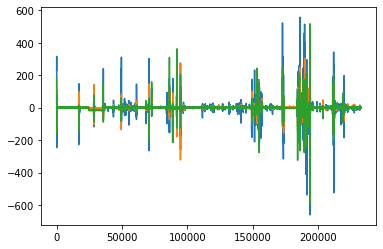

Raw Data from Activity 3 Across 19 Datasets


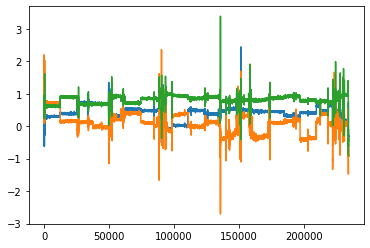

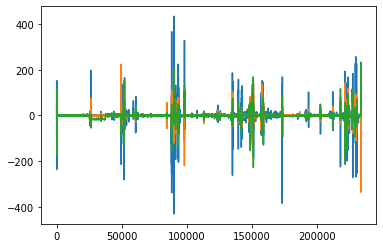

Raw Data from Activity 4 Across 19 Datasets


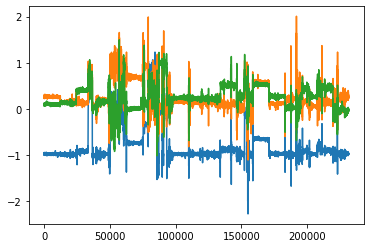

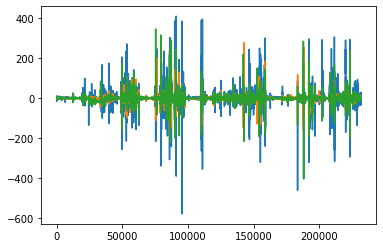

Raw Data from Activity 5 Across 19 Datasets


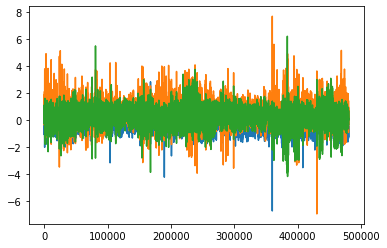

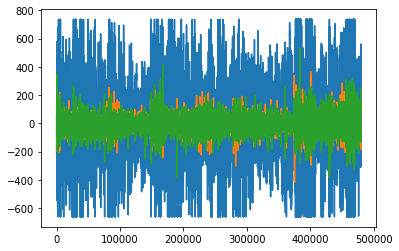

Raw Data from Activity 6 Across 19 Datasets


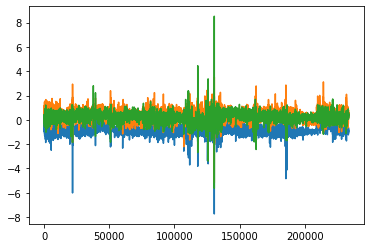

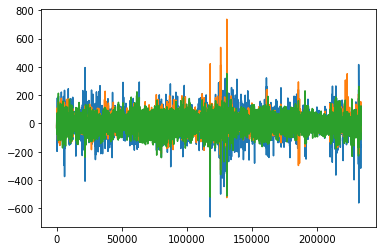

Raw Data from Activity 7 Across 19 Datasets


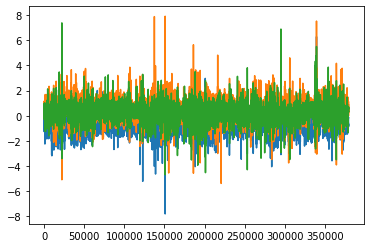

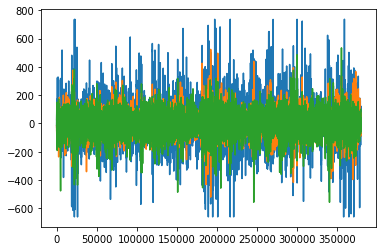

Raw Data from Activity 8 Across 19 Datasets


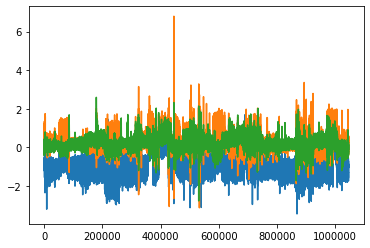

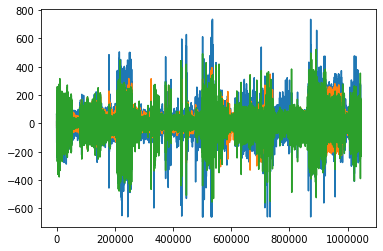

Raw Data from Activity 9 Across 19 Datasets


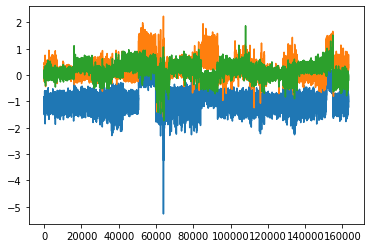

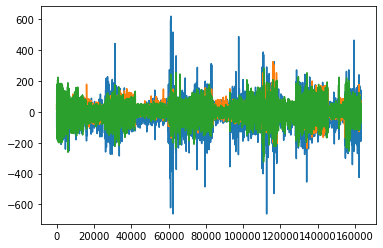

Raw Data from Activity 10 Across 19 Datasets


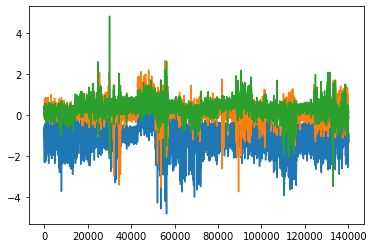

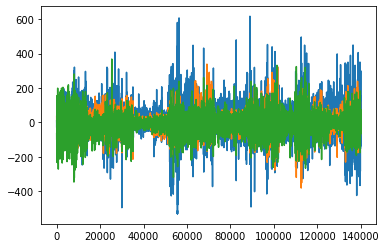

Raw Data from Activity 11 Across 19 Datasets


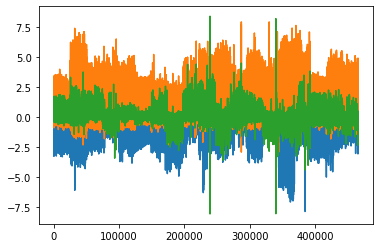

Raw Data from Activity 12 Across 19 Datasets


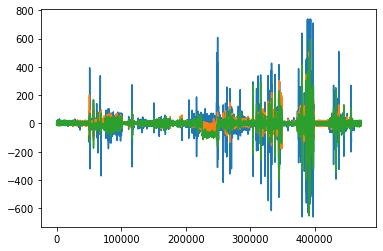

Raw Data from Activity 13 Across 19 Datasets


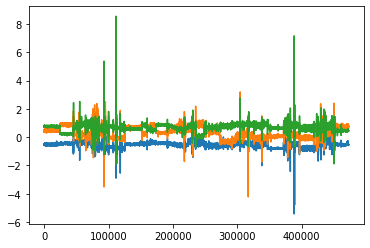

Raw Data from Activity 14 Across 19 Datasets


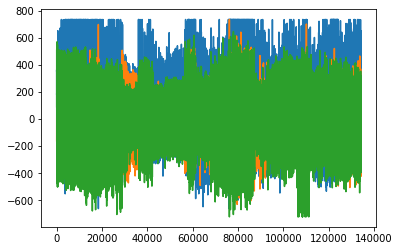

Filtered Data from Activity 2 Across 19 Datasets


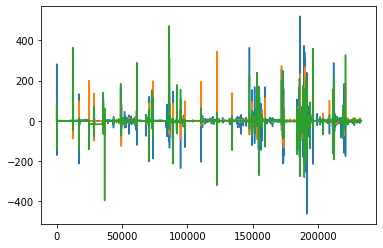

Filtered Data from Activity 3 Across 19 Datasets


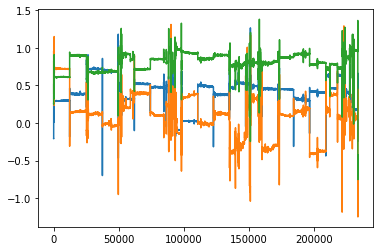

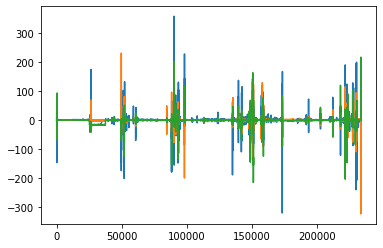

Filtered Data from Activity 4 Across 19 Datasets


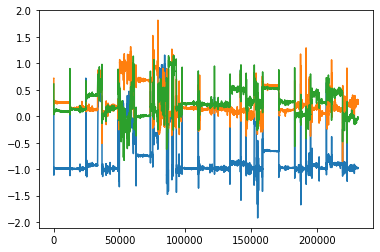

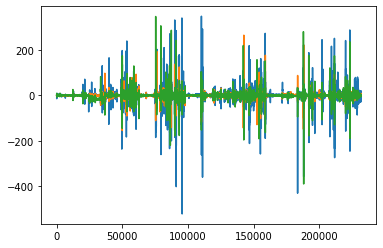

Filtered Data from Activity 5 Across 19 Datasets


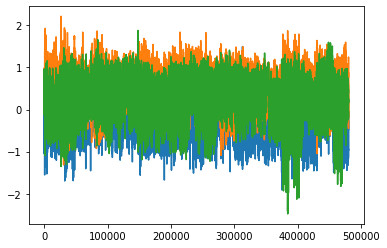

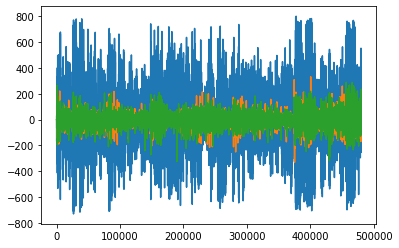

Filtered Data from Activity 6 Across 19 Datasets


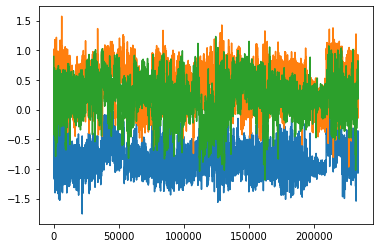

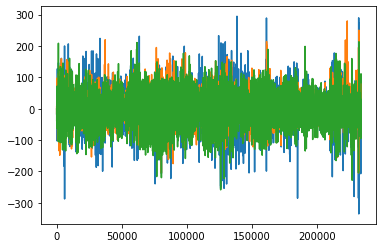

Filtered Data from Activity 7 Across 19 Datasets


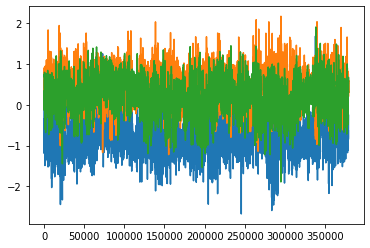

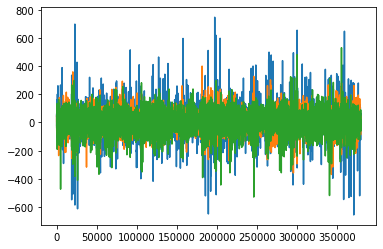

Filtered Data from Activity 8 Across 19 Datasets


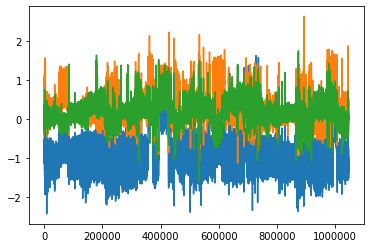

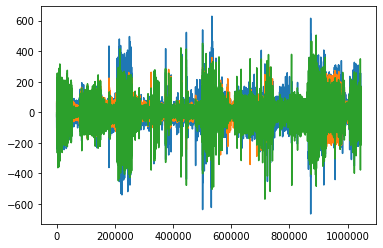

Filtered Data from Activity 9 Across 19 Datasets


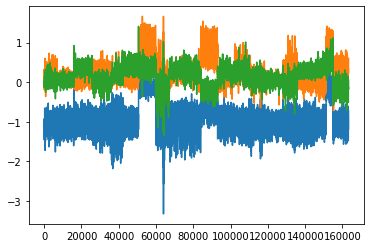

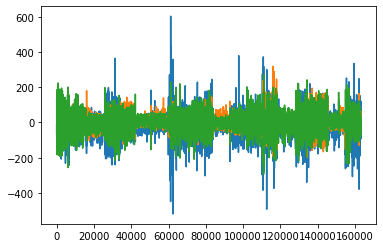

Filtered Data from Activity 10 Across 19 Datasets


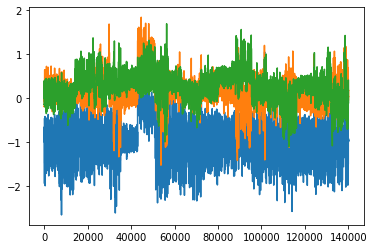

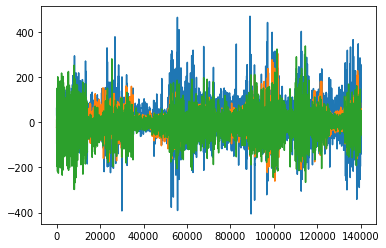

Filtered Data from Activity 11 Across 19 Datasets


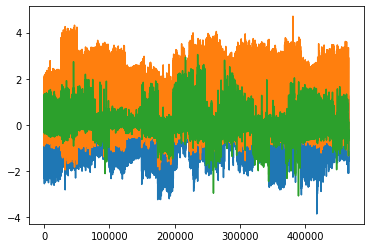

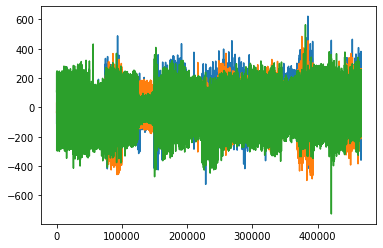

Filtered Data from Activity 12 Across 19 Datasets


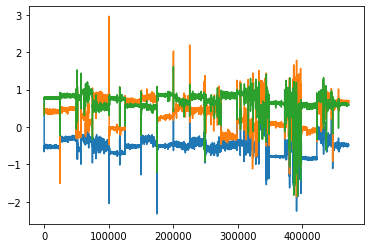

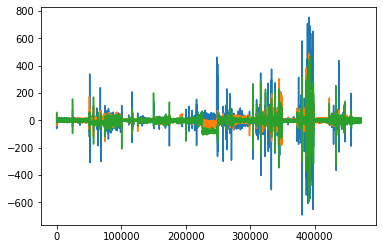

Filtered Data from Activity 13 Across 19 Datasets


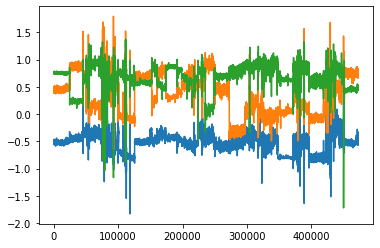

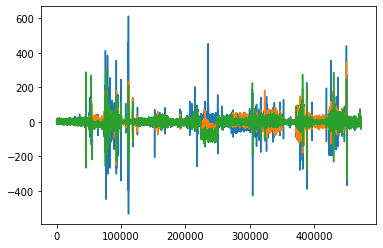

Filtered Data from Activity 14 Across 19 Datasets


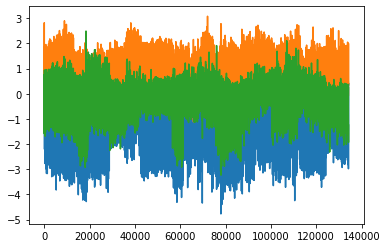

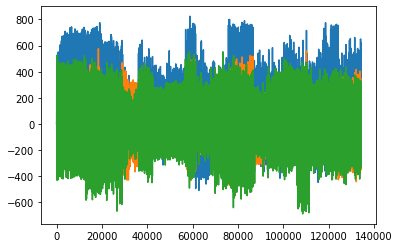

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
Accuracy:  0.9222648752399232
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  56   1   0   0   0   0   0   0   0   0   0]
 [  0   0   2  96   1   0   0   0   0   0   0   0   0]
 [  0   0   1   1  47   5   1   1   1   0   0   0   0]
 [  0   0   0   1  16  67   0   1   0   0   0   0   0]
 [  0   0   2   0   3   1 211   1   0   0   1   0   0]
 [  0   0   1   0   0   0   2  35   0   0   0   1   0]
 [  0   0   0   0   0   1   2   0  35   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  95   0   0   0]
 [  0   0   0   0   0   1   0 

C:\Users\caleb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best clf: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.9309021113243762
[[ 57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1  96   1   1   0   0   0   0   0   0   0]
 [  0   0   1   1  47   8   0   0   0   0   0   0   0]
 [  0   0   0   1   7  77   0   0   0   0   0   0   0]
 [  0   0   2   0   3   4 210   0   0   0   0   0   0]
 [  0   0   0   0   1   1   0  37   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  36   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0  95   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0  84  13   0]
 [  0   0   0   0   0   2   0   0   0   0  17  81   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0  36]]


In [3]:
data_visulization()
prepare_datasets()
model_preperation()